### Looking at our dataset, we can see that we have three categories that are dependent on the person, and not on his genetics:
#### "Alcohol Intake", "Smoking", and "Exercise Hours".


### We want to check how to maximize those categories in order to not have a heart disease, and also to check what difference it would ultimetly make if we do so, meaning how much can we actually "control" our life.

#### first, we want to check what is the significance of our features, meaning how much does they way in in heart disease problem.

In [3]:
import pandas as pd
df = pd.read_csv("/home/yair/Documents/Bar-Ilan/third-year/semester2/Statistical-Theory/heart_disease_dataset.csv")
df.head()

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
0,75,Female,228,119,66,Current,Heavy,1,No,No,Yes,8,119,Yes,Atypical Angina,1
1,48,Male,204,165,62,Current,Nothing,5,No,No,No,9,70,Yes,Typical Angina,0
2,53,Male,234,91,67,Never,Heavy,3,Yes,No,Yes,5,196,Yes,Atypical Angina,1
3,69,Female,192,90,72,Current,Nothing,4,No,Yes,No,7,107,Yes,Non-anginal Pain,0
4,62,Female,172,163,93,Never,Nothing,6,No,Yes,No,2,183,Yes,Asymptomatic,0


#### Let's plot each of our features in relation with our label

Alcohol Intake
Heavy       0.361272
Moderate    0.436306
Nothing     0.382353
Name: Heart Disease, dtype: float64


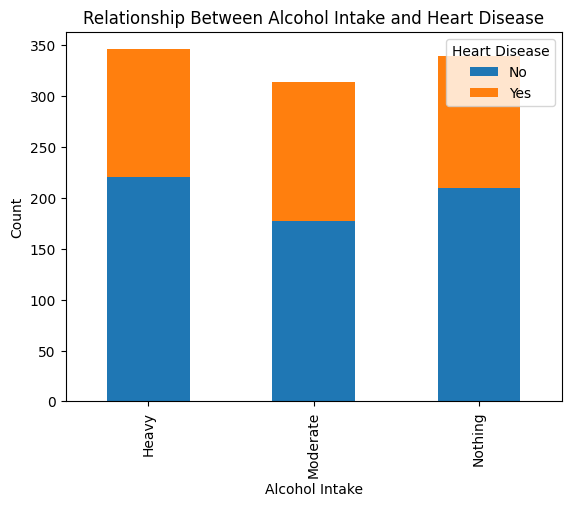

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
# Aggregate the data
agg_data = df.groupby(['Alcohol Intake', 'Heart Disease']).size().unstack().fillna(0)

#show ratio
ratio_data = df.groupby('Alcohol Intake')['Heart Disease'].mean()

print(ratio_data)


# Plot the data
agg_data.plot(kind='bar', stacked=True)

# Customize the plot
plt.title('Relationship Between Alcohol Intake and Heart Disease')
plt.xlabel('Alcohol Intake')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])


# Show the plot
plt.show()

#### And the result seems to be that actually being a moderate drinker is worst for you, while being an heavy drinker is the best.

#### Let's now plot heart disease with relation to exercise hours.

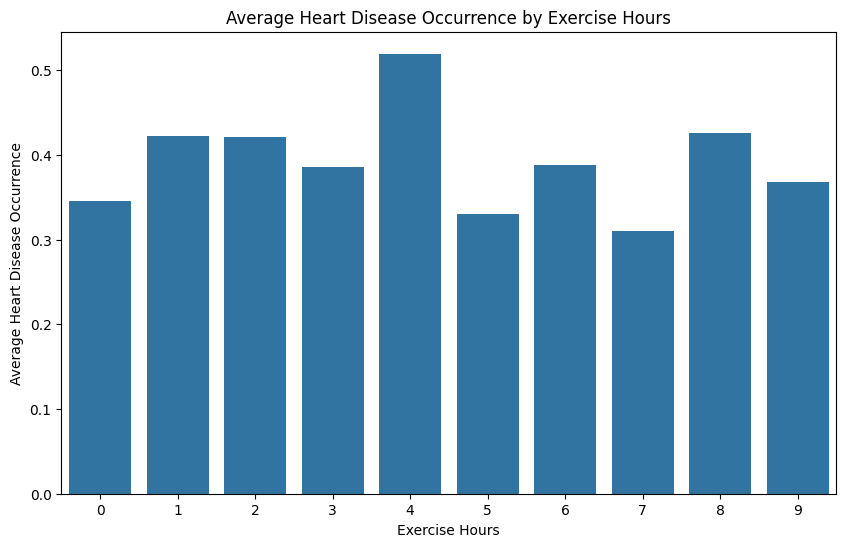

In [16]:
# Calculate the average heart disease occurrence per exercise hour
avg_heart_disease = df.groupby('Exercise Hours')['Heart Disease'].mean()

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_heart_disease.index, y=avg_heart_disease.values)

# Customize the plot
plt.title('Average Heart Disease Occurrence by Exercise Hours')
plt.xlabel('Exercise Hours')
plt.ylabel('Average Heart Disease Occurrence')

# Show the plot
plt.show()

#### And if we split it in the middle, we will get:

/tmp/ipykernel_94755/419232128.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['0-4', '5-9'], y=avg_heart_disease, palette='viridis')


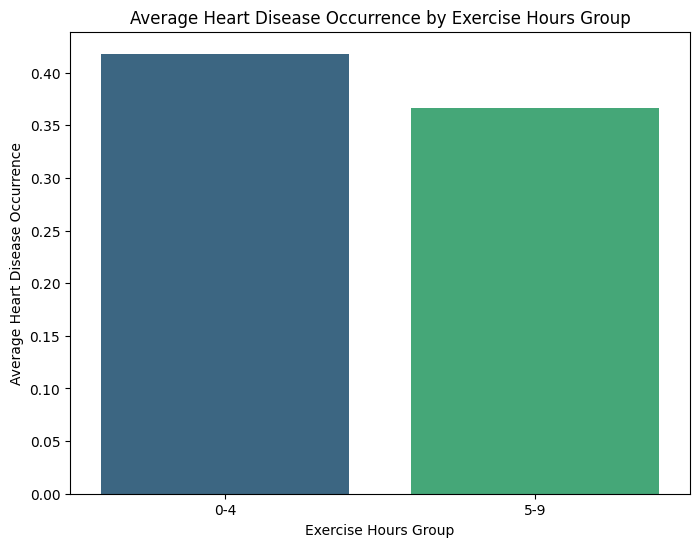

In [18]:
avg_heart_disease = []
avg_heart_disease.append(df[df['Exercise Hours'].between(0, 4)]['Heart Disease'].mean())
avg_heart_disease.append(df[df['Exercise Hours'].between(5, 9)]['Heart Disease'].mean())

# Plot the data
plt.figure(figsize=(8, 6))
sns.barplot(x=['0-4', '5-9'], y=avg_heart_disease, palette='viridis')

# Customize the plot
plt.title('Average Heart Disease Occurrence by Exercise Hours Group')
plt.xlabel('Exercise Hours Group')
plt.ylabel('Average Heart Disease Occurrence')

# Show the plot
plt.show()

#### We can see that having more than 5 excersie hours does seems to help not getting heart disease

#### and for the last feature, smoking.

/tmp/ipykernel_94755/1602022513.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_heart_disease_smoking.index, y=avg_heart_disease_smoking.values, palette='viridis')


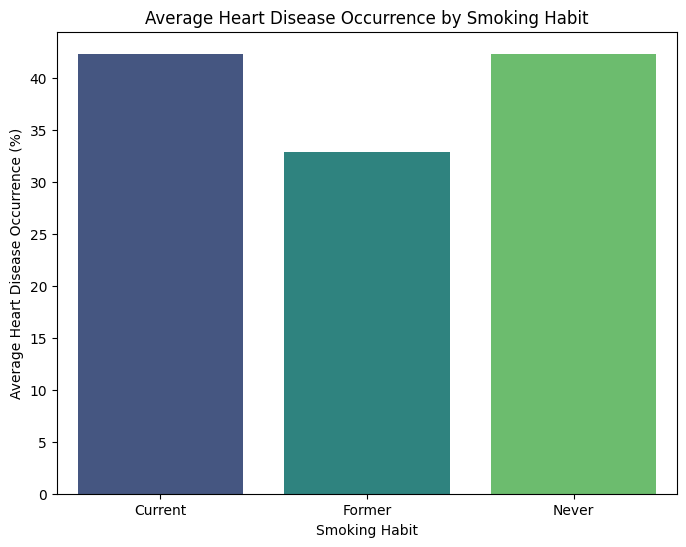

In [20]:
# Calculate the average heart disease occurrence for each smoking category
avg_heart_disease_smoking = df.groupby('Smoking')['Heart Disease'].mean() * 100

# Plot the data
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_heart_disease_smoking.index, y=avg_heart_disease_smoking.values, palette='viridis')

# Customize the plot
plt.title('Average Heart Disease Occurrence by Smoking Habit')
plt.xlabel('Smoking Habit')
plt.ylabel('Average Heart Disease Occurrence (%)')

# Show the plot
plt.show()